In [257]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
file_city = "/Users/daryarudych/Desktop/repos/05-Matplotlib/city_data.csv"
file_ride = "/Users/daryarudych/Desktop/repos/05-Matplotlib/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(file_city)
ride_data= pd.read_csv(file_ride)

#Combine the data into a single dataset
merged_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

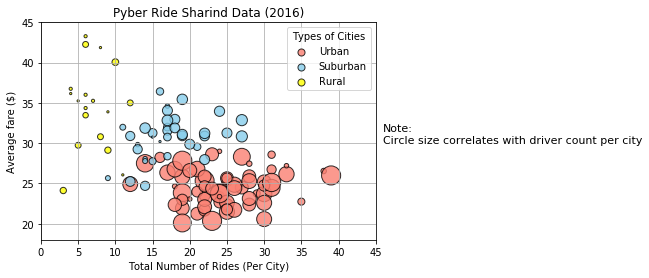

In [258]:
#Build a Bubble Plot that showcases the relationship between four key variables:
#x_axis will get the total number of rides per city per city type
#y_axis will get the average fare per city per city type 
#s will represent the number of drivers per city

def getx_axis(dataset, RideType):
   ride_type = dataset.loc[dataset["type"]==RideType]
   ride_type = ride_type.groupby("city").count()
   return ride_type["ride_id"]

def gety_axis(dataset, RideType):
    avg_fare = dataset.loc[dataset['type']==RideType]
    avg_fare = avg_fare.groupby('city')['fare'].mean()
    avg_fare = np.round(avg_fare, 2)
    return avg_fare 

def get_s (dataset, RideType):
    size = dataset.loc[dataset["type"]==RideType]
    size = size['driver_count']
    size = size*5
    #size = [8.*s for s in size]
    return size

urban_x = getx_axis(merged_data, "Urban")
suburban_x = getx_axis(merged_data, "Suburban")
rural_x = getx_axis(merged_data, "Rural")

urban_y = gety_axis(merged_data, "Urban")
suburban_y = gety_axis(merged_data, "Suburban")
rural_y = gety_axis(merged_data, "Rural")

urban_s = get_s(merged_data, "Urban")
suburban_s = get_s(merged_data, "Suburban")
rural_s = get_s(merged_data, "Rural")

#Setting colors:
urban_c = 'salmon'
suburban_c = 'skyblue'
rural_c = 'yellow'
edge = 'black'

#Scaling the size of bubble plots

#x_axis = [urban_x, suburban_x, rural_x]
#y_axis = [urban_y, suburban_y, rural_y]
#s = [urban_s, suburban_s, rural_s]


#Build a Bubble Plot
urban = plt.scatter(urban_x, urban_y, s = urban_s, alpha = 0.8, c = urban_c, edgecolor=edge, label = "Urban")
suburban = plt.scatter(suburban_x, suburban_y, s = suburban_s, alpha = 0.8, c = suburban_c, edgecolor=edge , label = "Suburban")
rural = plt.scatter(rural_x, rural_y, s = rural_s, alpha = 0.8, c = rural_c, edgecolor=edge, label = "Rural")
plt.title('Pyber Ride Sharind Data (2016)')
plt.xlim((np.min(0), np.max(45)))
plt.ylim((np.min(18), np.max(45)))

#Creating a legend with non-scaled size of markers
lgnd = plt.legend(loc = 1, title = "Types of Cities")

for handle in lgnd.legendHandles:
    handle.set_sizes([50])

#Setting label names for x,y-axis, and grid :
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.grid()

#Adding text 
plt.text(46, 30, "Note:\nCircle size correlates with driver count per city", fontsize=11)

# Save Figure
plt.savefig('BubblePlot_RideSharingData.png', dpi='figure', papertype="letter", bbox_inches="tight")

In [259]:
# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Total Fares by City Type

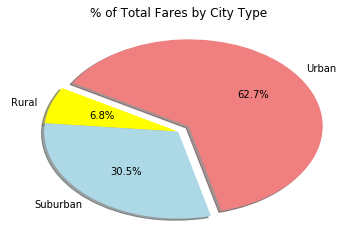

In [260]:
#Pie Chart 1
# Calculate Type Percents

total = merged_data.groupby('type').sum()
fares_per_city = total['fare']/total['fare'].sum()
fares_per_city
colors = ["yellow", "lightblue", "lightcoral"]
explode = (0, 0, 0.1)

#Build a Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(fares_per_city, explode=explode, labels=fares_per_city.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.savefig('TotalFaresChart.png')

# Show Figure
plt.show()

## Total Rides by City Type

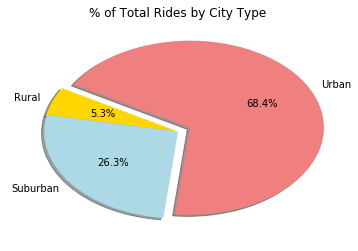

In [261]:
# Calculate Ride Percents
rides = merged_data.groupby('type').count()
rides_by_city = rides['ride_id']/rides['ride_id'].sum()

# Build Pie Chart
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides by City Type")
plt.pie(rides_by_city, explode=explode, labels=rides_by_city.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig('TotalRidesChart.png')

# Show Figure
plt.show()

## Total Drivers by City Type

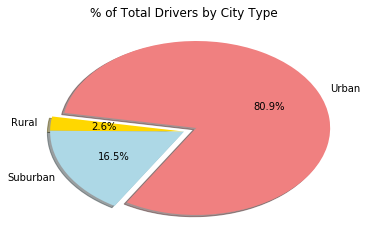

In [278]:
# Calculate Driver Percents
drivers = merged_data[['city', 'driver_count', 'type']].drop_duplicates()
drivers_per_type = drivers.groupby('type').sum()
drivers_by_city = drivers_per_type["driver_count"]/drivers_per_type["driver_count"].sum()

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_by_city, explode=explode, labels=drivers_by_city.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig('TotalDriversChart.png')

# Show Figure
plt.show()


## Findings:

1. Despite most revenue being generated in urban areas, rural and suburban areas, too, have significant demand for ride-sharing services that should not be ignored.
2. The above charts show a disproportionate ratio between rural rides and number of drivers operating there. This suggests that by hiring more rural drivers the company can not only increase the demand but also lower the fares since rural drivers will cost less than drivers operating in urban and suburban areas.
3. Clearly, rural and suburban rides present the biggest opportunity emerging companies like Pyber should tap into. The bubble chart above demostrates that rural and suburban areas are largely underserved having the least number drivers and yet the highest ride-sharing fares.
